<h1 style="text-align:center;">Nerve Quadrature Analysis</h1>
<h3 style="text-align:center;margin:0;">Vijay Stroup</h3>
<p style="text-align:center;margin:0;">University of Central Florida • November 6, 2021</p>

# Introduction

In a study conducted by John Cahn, John Mallet-Paret, and Erik van Vleck on 
["Traveling Wave Solutions for Systems of ODEs on a Two-Dimensional Spatial Lattice"](http://www.jstor.org/stable/118432), 
they have deduced an function $\psi$ to represent a impuluse in the human nervious 
system. 

Consider the function $\psi: \mathbb{R}\rightarrow\mathbb{R}$

$$
\psi(x) =
\frac{1}2 + \frac{1}\pi \int_0^\infty \frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)} ds +
\frac{c}\pi \int_0^\infty \frac{cos(sx)}{A(s)^2 + c^2s^2} ds
$$

$$ A(s) = 1 + 2(1 - cos(s)) $$

$\psi$ is the wave function representation of We can use different methods of 
integration to estimate $\psi$ at different values of x and c.  

The methods of quadrature approximation that will be used in this project will 
be the following:  
<br/>
Midpoint: $$\int_a^b f(x) dx \approx (b-a)f(\frac{b+a}2)$$  
<br/>
Trapezoidal: $$\int_a^b f(x) dx \approx \frac{b-a}2 (f(a)+f(b)$$  
<br/>
Simpson: $$\int_a^b f(x) dx \approx \frac{h}3 (f(a) + 4f(a+h) + f(a+2h)), \qquad h=\frac{b-a}2$$  
<br/>

In genearl, we can write a quadrature formula as
$$\int_a^b f(x)dx \approx \sum_{i=1}^n w_i f(x_i)$$
where we want to choose weights $w_i$ and nodes so that the formula is as accurate as possible.

When doing quadrature analysis, we run into the problem of not knowing what the 
exact integral will be when comparing for error. Thus, we must use specific 
algorithms that do not require a compairson of the exact answer.  

For the Midpoint rule, we can use same as trapezoidal but coef is different

<br/>

For The Trapezoidal rule, we can use Richardson's Error Estimate to determine
how accurate each iteration is. Richardson's Error Estimate is defined as:
$$|\int_a^b f(x) dx - T_n| \leq \frac{h^2}{12} (b-a) \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For Simpson's rule, we can use the error term defined as:
$$-\frac{1}{90} (\frac{b-a}2)^5 f^{(4)}(\epsilon)$$

I believe that Simpon's Rule will be more accurate when estimaing what this function should be. It will also be able to be more accurate with many less nodes than required by the trapezodial rule. This is shown by calculating the number of nodes needed to achieve a certain error for both methods. While the midpoint rule only requires the two end nodes, it can can be highly inaccurate as we will see later in the error analysis.

For our function $\psi$, it is reasonable to vary c within the interval [0, 10] 
and then choose values of x that will capture a good amount of data without 
sacrificing a lot of time. This can be done by checking, on each iteration, the
result relative to the previous iteration and cutting it off after a certain
threshold.  

Things to think about when analyzing this problem are:
- Our limits of integration are from 0 to $\infty$, what would be a good cut off point for
    our upper bound?
- What happens we set c=0 which is still in our acceptable range? It would make
    the third term of $\psi$ go to 0.
- Compounding error on each iteration?

# Analyis

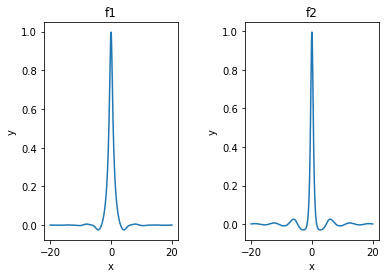

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

A = lambda s: 1 + 2 * (1 - np.cos(s))
f1 = lambda c, s, x: (A(s) * np.sin(s*x)) / (s * (A(s)**2 + c**2 * s**2))
f2 = lambda c, s, x: np.cos(s*x) / (A(s)**2 + c**2 * s**2)

c, x = 1, 1
xs = np.linspace(-20, 20, 500)
f1ys = [f1(c, i, x) for i in xs]
f2ys = [f2(c, i, x) for i in xs]

fig, ax = plt.subplots(1, 2)

ax[0].plot(xs, f1ys)
ax[0].set_title('f1')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(xs, f2ys)
ax[1].set_title('f2')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.subplots_adjust(wspace=.5)
plt.show()

In [13]:
from scipy.integrate import quad

def second_term(s, x, c):
    return (A(s) * np.sin(s*x)) / (s * (A(s)**2 + c**2 * s**2)) # ds

def third_term(s, x, c):
    return np.cos(s*x) / (A(s)**2 + c**2 * s**2) # ds

c = 1

xs = np.linspace(-10, 10, 1000)
ys = []
for x in xs:
    I1 = quad(second_term, 0, np.inf, args=(x, c))
    I2 = quad(third_term, 0, np.inf, args=(x, c))
    y = 1/2 + (1/np.pi * I1[0]) + (c/np.pi * I2[0])
    ys.append(y)

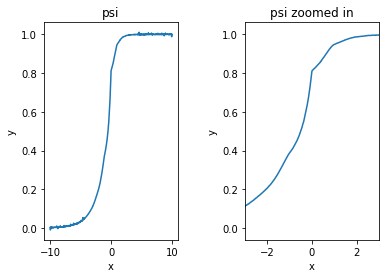

In [15]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(xs, ys)
ax[0].set_title('psi')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(xs, ys)
ax[1].set_title('psi zoomed in')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_xlim(-3, 3)

plt.subplots_adjust(wspace=.5)
plt.show()

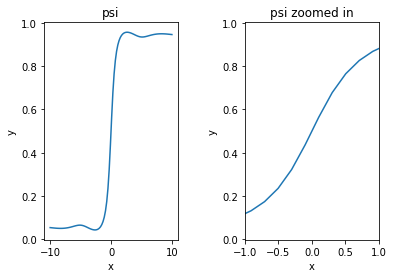

In [6]:
from scipy.integrate import trapezoid

c, x = 1, 1
xs = np.linspace(-10, 10, 100)

def psi(func, topx):
    limits_of_int = np.linspace(0.000000000001, topx, 500) # can not divide by 0 in psi
    a = func([f1(c, i, x) for i in limits_of_int], limits_of_int)
    b = func([f2(c, i, x) for i in limits_of_int], limits_of_int)

    return 1/2 + 1/np.pi * a + c/np.pi * b

psis = [psi(trapezoid, i) for i in xs]

fig, ax = plt.subplots(1, 2)

ax[0].plot(xs, psis)
ax[0].set_title('psi')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(xs, psis)
ax[1].set_title('psi zoomed in')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_xlim(-1, 1)

plt.subplots_adjust(wspace=.5)
plt.show()